In [1]:
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table
from matplotlib.ticker import AutoMinorLocator

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from matplotlib import colors as mcolors
from matplotlib import gridspec

In [2]:
from astropy.cosmology import FlatLambdaCDM
# In this case we just need to define the matter density 
# and hubble parameter at z=0.
# Note the default units for the hubble parameter H0 are km/s/Mpc. 
# You can also pass an astropy `Quantity` with the units specified. 
cosmo = FlatLambdaCDM(H0=67.7, Om0=0.307)  #Banados thesis

In [3]:
import astropy.units as u
ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1, 0.8, 0.70])*u.Gyr
from astropy.cosmology import z_at_value
ageticks = [z_at_value(cosmo.age, age) for age in ages]

In [4]:
## READ-IN THE DATA FILE(S)
path = '/cos_pc19a_npr/programs/quasars/highest_z/data/'
infile = 'THE_TABLE_v0pnt971.ascii'
readin = path+infile
all_VHzQs  = ascii.read(readin, delimiter=r'\s')

In [5]:
all_VHzQs

na,desig,ra_hms,dec_dms,ra,dec,redshift,mag,M1450,errM1450,ra_WISE,dec_WISE,w1mag,w1err,w1snr,w2mag,w2err,w2snr,w3mag,w3err,w3snr,w4mag,w4err,w4snr,ref
str7,str17,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str23
PSO,J000.3401+26.8358,00:01:21.63,+26:50:09.17,0.34011348,26.83588138,5.75,19.52,-27.16,9.99,0.3400887,26.835823,16.373,0.066,16.5,15.266,0.107,10.2,12.594,0.492,2.2,8.756,-9.99,1.1,1/1/1
SDSS,J0002+2550,00:02:39.39,+25:50:34.80,0.66411726,25.84304425,5.82,19.39,-27.31,9.99,0.6641312,25.8430852,16.162,0.057,19.0,15.542,0.127,8.5,12.416,0.423,2.6,8.683,-9.99,1.2,5/22/1
SDSS,J0005-0006,00:05:52.34,-00:06:55.80,1.4680833,-0.1154999,5.85,20.98,-25.73,9.99,1.4683933,-0.1154292,17.299,0.16,6.8,17.043,-9.99,0.2,12.445,-9.99,-1.1,9.008,-9.99,-0.3,5/12/1
PSO,J002.1073-06.4345,00:08:25.77,-06:26:04.60,2.10739,-6.43456,5.93,20.41,-26.32,9.99,2.1073696,-6.4345725,16.809,0.107,10.1,15.684,0.141,7.7,11.892,-9.99,1.5,8.759,-9.99,0.2,1;43/1/1
SDWISE,J0008+3616,00:08:51.43,+36:16:13.49,2.2142917,36.2704138,5.17,19.12,-27.34,9.99,2.2142355,36.2704366,16.045,0.052,20.7,15.373,0.092,11.8,12.043,-9.99,1.8,8.786,-9.99,1.1,Wang2016
PSO,J002.3786+32.8702,00:09:30.89,+32:52:12.94,2.37870183,32.87026179,6.1,21.13,-25.65,9.99,2.3787018,32.8702618,-99.99,-9.99,-9.9,-99.99,-9.99,-9.9,-99.99,-9.99,-9.9,-9.99,-9.99,-9.9,1/1/1
SDSS,J0017-1000,00:17:14.68,-10:00:55.4,4.3111666,-10.01539722,5.011,99.99,-99.99,9.99,4.3111476,-10.0154269,15.936,0.055,19.7,15.167,0.094,11.5,12.026,0.334,3.2,8.52,-9.99,1.2,DR7_W16
PSO,J004.3936+17.0862,00:17:34.47,+17:05:10.70,4.39361347,17.08630447,5.8,20.69,-26.01,9.99,4.3936134,17.0863047,-99.99,-9.99,-9.9,-99.99,-9.99,-9.9,-99.99,-9.99,-9.9,-9.99,-9.99,-9.9,1/1/1
PSO,J004.8140-24.2991,00:19:15.38,-24:17:56.98,4.81408,-24.29916,5.68,19.43,-27.24,9.99,4.814116,-24.2990993,16.281,0.069,15.8,15.569,0.116,9.4,12.123,0.344,3.2,8.82,-9.99,0.5,1/1/1


In [6]:
## Gotta give credit where it's due... 
## Kulkarni, of arXiv:1807.09774v1 fame, 
## gives full datafiles and scripts on their GitHub::
## https://github.com/gkulkarni/QLF 
##
## Load e.g. the k-correction based on Lusso et al. (2015)
kcorr_path= '/cos_pc19a_npr/programs/quasars/highest_z/Lz/kcorr/'

## There's the g-band correction (essentially z<2.2)
z_kcorr_gband, kcorr_Lusso15_gband = np.loadtxt(kcorr_path+'kcorrg_l15.dat', usecols=(1,2), unpack=True)
## There's the g-band correction (essentially z<4.7)
z_kcorr_iband, kcorr_Lusso15_iband = np.loadtxt(kcorr_path+'kcorri_l15.dat', usecols=(1,2), unpack=True)
## There's the g-band correction (essentially 4.7<z<5.5)
z_kcorr_zband, kcorr_Lusso15_zband = np.loadtxt(kcorr_path+'kcorrz_l15.dat', usecols=(1,2), unpack=True)


In [7]:
##
## DISTANCE MODULUS CALCULATIONS!!!!
##
##   m - M = 5 * log(d) - 5
## m is the apparent magnitude of the object
## M is the absolute magnitude of the object
## d is the distance to the object in parsecs

In [8]:
cosmo

FlatLambdaCDM(H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)

In [9]:
cosmo.luminosity_distance(4)

<Quantity 36799.94270634 Mpc>

In [10]:
cosmo.luminosity_distance(all_VHzQs['redshift'])

<Quantity [56363.07313576, 57162.69072754, 57505.72749517, 58421.48623185,
           49783.21758576, 60372.17528423, 47994.58755644, 56934.11361849,
           55564.59236539, 69631.59283343, 48545.06450919, 66353.35131019,
           48657.48801147, 59223.94531366, 51589.90929588, 60717.06473882,
           56020.72681811, 58650.64963774, 64060.70441779, 62133.10362002,
           48882.41709733, 59292.77775369, 62972.69921289, 58650.64963774,
           53857.47722805, 49107.45515489, 68361.54735169, 47871.10256097,
           48994.92253974, 48657.48801147, 51589.90929588, 56819.85944088,
           47983.36025592, 56690.77988758, 49895.93847268, 58077.90828667,
           51250.64662631, 61637.70435706, 57505.72749517, 62790.38667277,
           62098.52838557, 58994.56091842, 51816.21272381, 59109.24212779,
           59453.4174208 , 59568.18624548, 56020.72681811, 52042.61821443,
           59568.18624548, 50459.94090592, 64202.90080915, 48432.66846197,
           63482.98327215

In [11]:
d_Mpc = cosmo.luminosity_distance(all_VHzQs['redshift'])

In [12]:
#d_Mpc.value

In [13]:
kcorr = 0.0

In [14]:
Abs_Mag = (all_VHzQs['mag'])  - (5.*(np.log10(d_Mpc.value))) - 25. + kcorr
#Abs_Mag

In [15]:
delta_mags = Abs_Mag - all_VHzQs['M1450'] 

In [16]:
Abs_Mag[0]

-29.23497332260522

In [17]:
all_VHzQs[1]

na,desig,ra_hms,dec_dms,ra,dec,redshift,mag,M1450,errM1450,ra_WISE,dec_WISE,w1mag,w1err,w1snr,w2mag,w2err,w2snr,w3mag,w3err,w3snr,w4mag,w4err,w4snr,ref
str7,str17,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str23
SDSS,J0002+2550,00:02:39.39,+25:50:34.80,0.66411726,25.84304425,5.82,19.39,-27.31,9.99,0.6641312,25.8430852,16.162,0.057,19.0,15.542,0.127,8.5,12.416,0.423,2.6,8.683,-9.99,1.2,5/22/1


In [18]:
Abs_Mag[1]

-29.395563317233737

In [19]:
z_slope_in = (np.arange(800)/100)
z_slope = -2.5*(np.log10(1+z_slope_in))

(-20.5, -34.0)

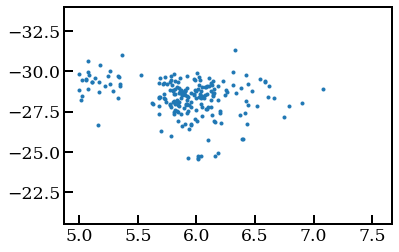

In [20]:
fig, ax = plt.subplots()
ax.scatter(all_VHzQs['redshift'], Abs_Mag, marker='.')
ymin = -20.5
ymax = -34.0
ax.set_ylim((ymin, ymax))

(-2.5, -0.0)

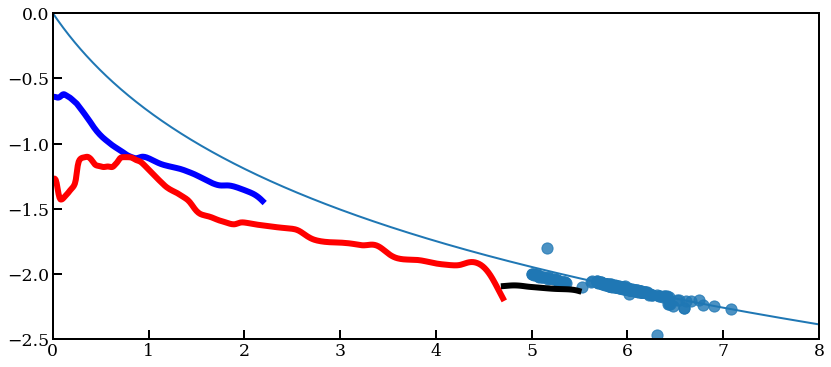

In [21]:
fig, ax = plt.subplots(figsize=(14,6))
s = 500
lw=6

plt.plot(z_kcorr_gband, kcorr_Lusso15_gband, c='b', lw=lw) 
plt.plot(z_kcorr_iband, kcorr_Lusso15_iband, c='r', lw=lw) 
plt.plot(z_kcorr_zband, kcorr_Lusso15_zband, c='k', lw=lw) 

plt.plot(z_slope_in, z_slope, lw=2)

ax.scatter(all_VHzQs['redshift'], delta_mags, marker='.', s=s, alpha=0.8)

xmin =  0.0
xmax =  8.0
ax.set_xlim((xmin, xmax))

ymin = -2.5
ymax = -0.0
ax.set_ylim((ymin, ymax))

(-2.5, -1.8)

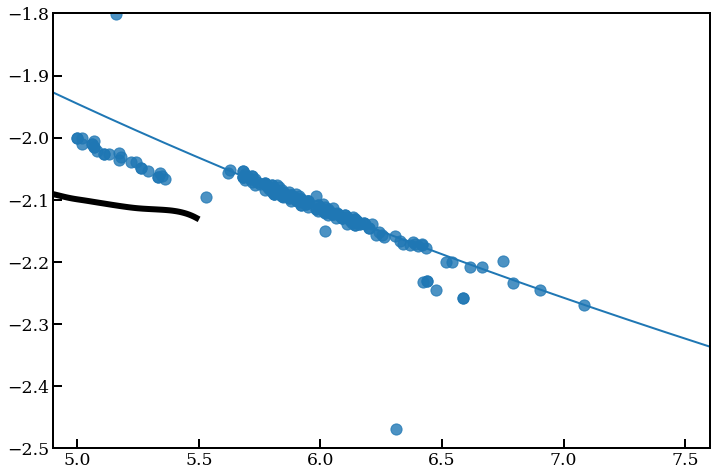

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
s = 500
lw=6

plt.plot(z_kcorr_gband, kcorr_Lusso15_gband, c='b', lw=lw) 
plt.plot(z_kcorr_iband, kcorr_Lusso15_iband, c='r', lw=lw) 
plt.plot(z_kcorr_zband, kcorr_Lusso15_zband, c='k', lw=lw) 

plt.plot(z_slope_in, z_slope, lw=2)

ax.scatter(all_VHzQs['redshift'], delta_mags, marker='.', s=s, alpha=0.8)

xmin =  4.9
xmax =  7.6
ax.set_xlim((xmin, xmax))

ymin = -2.5
ymax = -1.8
ax.set_ylim((ymin, ymax))